<h2>DATA SCIENCE AND BUSINESS ANALYTICS INTERN AT THE SPARKS FOUNDATION</h2>
<h4>NAME: KAVYA E.</h4>

<h3>TASK 1 (From Different Domain, Computer Vision and Internet of Things) - Object Detection</h3>

We implement an object detector which identifies the classes of the objects in an image.

In [3]:
#Importing the required libraries
import cv2
import matplotlib.pyplot as plt

<h3>Creating a Deep Neural Network(DNN) Detection Model</h3>

We create the DNN Detection model for the loaded 'config_file' that holds the network of nodes for freezing our inference graph and 'frozen_model' which is the Frozen Inference Graph.

In [4]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'

frozen_model = 'frozen_inference_graph.pb'

In [5]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [1]:
classlabel =[]
file_name = 'coco_label.txt'
with open(file_name,'rt') as ftp:
    classlabel = ftp.read().rstrip('\n').split('\n')

print(len(classlabel))
#print(classlabel)

80


<h3>Setting parameters to the DNN Detection model for preprocessing the input image</h3>

In [7]:
model.setInputSize(320,320)               # new input size
model.setInputScale(1.0/127.5)            #255/127.5, multiplier for frame values
model.setInputMean((127.5,127.5,127.5))   # mobilenet=>[1,-1], setting mean value for frame
model.setInputSwapRB(True)                # flag that indicates to swap first and last channels

<dnn_Model 0000023A2F9858F0>

<h3>Read the Image</h3>

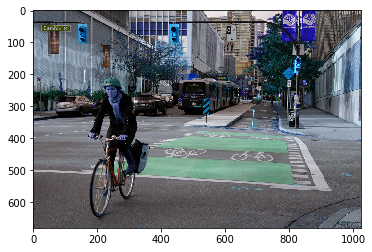

In [51]:
img = cv2.imread('img7.jpg')
plt.imshow(img)

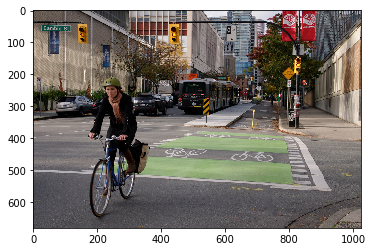

In [52]:
#Since the image is in BGR format, converting it to RGB format
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

<h3>Displaying the detected objects</h3>

[[ 3]
 [ 2]
 [ 3]
 [10]
 [ 6]
 [ 1]
 [ 3]
 [10]
 [10]
 [10]
 [10]
 [10]]


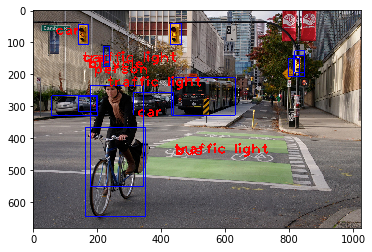

In [53]:
ClassIndex, confidence, bbox = model.detect(img,confThreshold=0.5)
print(ClassIndex)
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img,classlabel[ClassInd-1],(boxes[0]+10,boxes[0]+20),font,fontScale=font_scale,color=(0,0,255), thickness=3)

    
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

From the above output, we can observe that objects such as traffic lights, person(the girl),bicycle,bus and the cars are detected correctly from the single input image.